# HR ATTRITION ANALYSIS

IMPORT ALL THE LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the file

In [2]:
data=pd.read_csv(r'C:\Users\User\Desktop\data science\HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
data['Attrition'].value_counts()/len(data)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

1.There are 1470 observations and 35 features.


2.Dataset contains two types of data: object and integer.


3.There is no missing data


4.Here, Attrition is the dependent or target variable and others are independent variable.


5.It is a imbalance dataset as there almost 16% cases employee left company while 84% cases employee doing their job.

In [8]:
# Changing feature 'Attrition as a 'target with 1 as 'Yes'
data['Attrition'] = np.where(data['Attrition']=='Yes',1,0)

In [9]:
data=data.drop(['EmployeeNumber'],axis=1)

In [10]:
# color palette 
pal_2 = sns.color_palette("GnBu",n_colors=2)

In [11]:
#  function for count plot palette="plasma"
def count_Plot(feature, data,xl,yl,axs,hu=None):
    ax = sns.countplot(x=feature,palette=pal_2, data=data,hue=hu,ax=axs)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()),  ha='center', va='center', size=18)
    axs.set(xlabel=xl, ylabel=yl)

In [12]:
#  function for pie plot

def pie_plot(feature,data,xl,axs):
    co = data[feature].value_counts(normalize=True)
    labels = ['Employee Stay','Employee Quit']
#   colors = sns.color_palette('bright')[0:5]
    
    axs.pie(co, labels = labels, colors=pal_2,autopct='%.0f%%')
    axs.set(xlabel=xl)

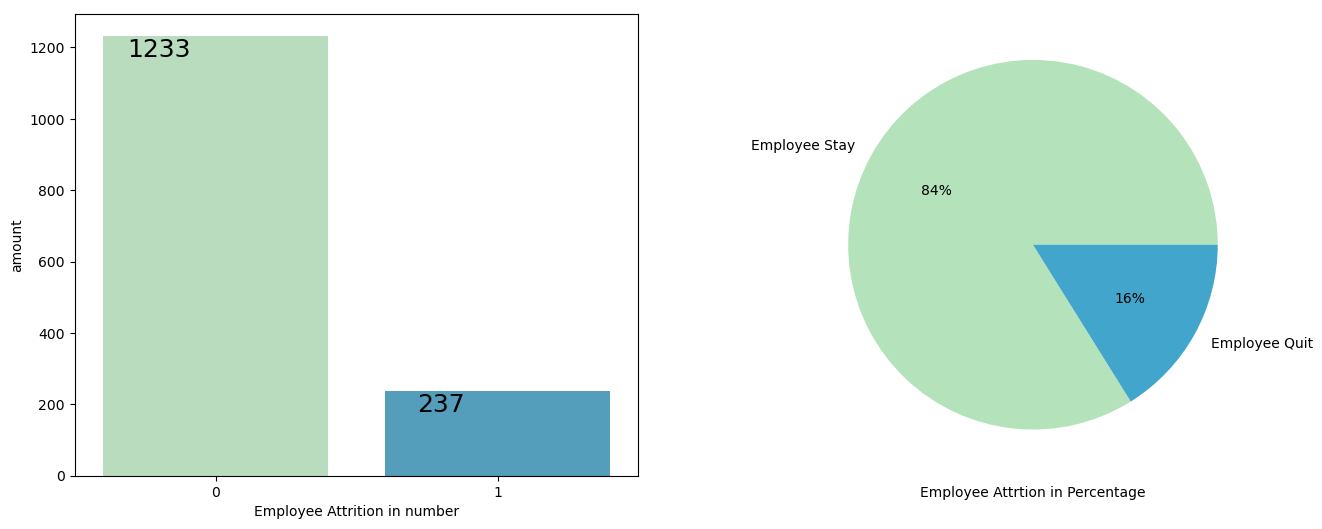

In [13]:
#  Attrition rate in dataset
fig, axes = plt.subplots(1,2, figsize=(16, 6))
count_Plot("Attrition",data,"Employee Attrition in number","amount",axes[0])
pie_plot('Attrition',data,"Employee Attrtion in Percentage",axes[1])
# plt.show()


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

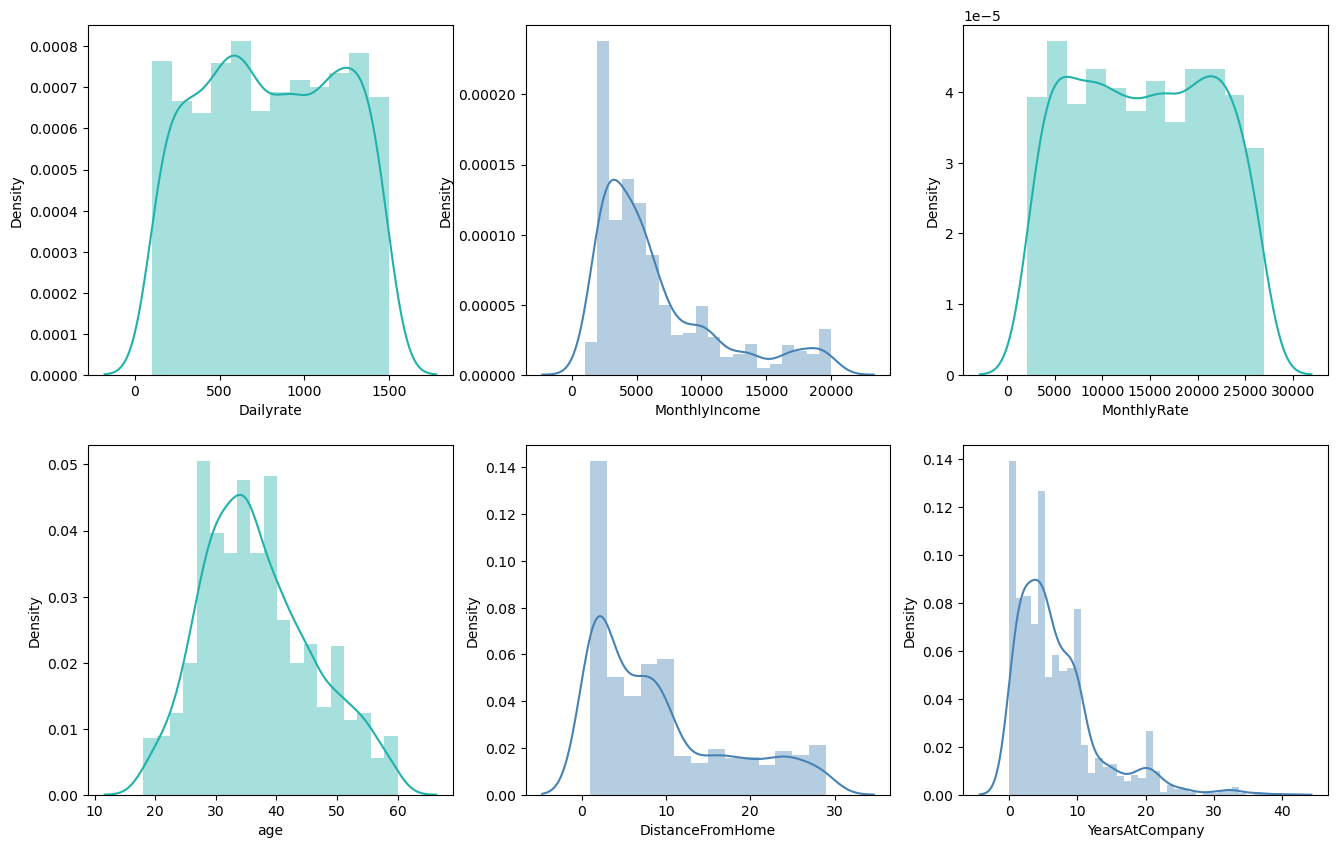

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.distplot(x=data['DailyRate'], kde=True,ax=axes[0,0],axlabel='Dailyrate',color='lightseagreen')
sns.distplot(x=data['MonthlyIncome'], kde=True,ax=axes[0,1],axlabel='MonthlyIncome',color='steelblue')
sns.distplot(x=data['MonthlyRate'], kde=True,ax=axes[0,2],axlabel='MonthlyRate',color='lightseagreen')
sns.distplot(x=data['Age'], kde=True,ax=axes[1,0],axlabel='age',color='lightseagreen')
sns.distplot(x=data['DistanceFromHome'], kde=True,ax=axes[1,1],axlabel='DistanceFromHome',color='steelblue')
sns.distplot(x=data['YearsAtCompany'], kde=True,ax=axes[1,2],axlabel='YearsAtCompany',color='steelblue')
plt.show()

In [15]:
# color_pall = sns.color_palette("GnBu",n_colors=4)
# color palette 
pal_7 = sns.color_palette("GnBu",n_colors=7)

In [16]:
# selecting catagorical feature 
cata=[]
feat = data.drop(['Attrition'],axis=1)
# for colu in X.columns:
for colu in feat:
    pa =data[colu].value_counts().count()
    if (pa>1) & (pa<10) :
        cata.append(colu)

<function matplotlib.pyplot.show(close=None, block=None)>

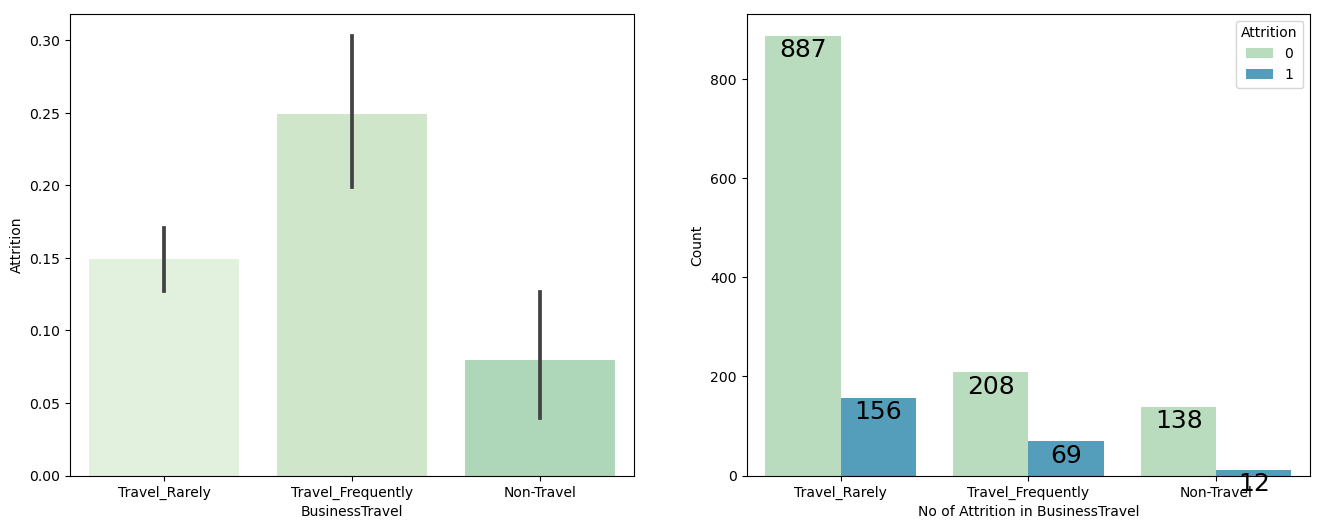

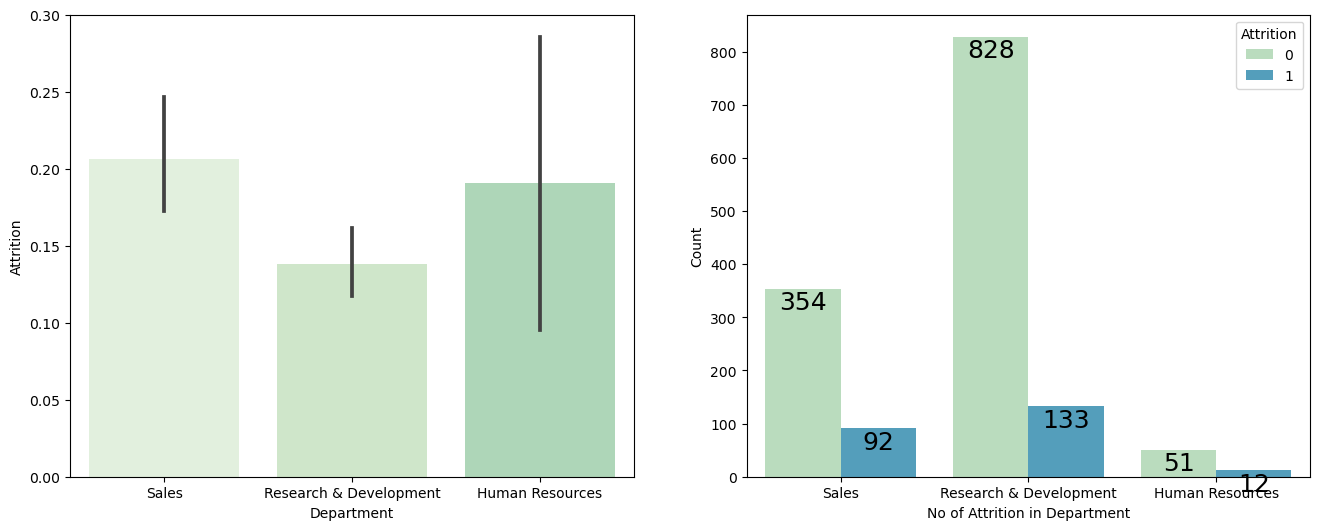

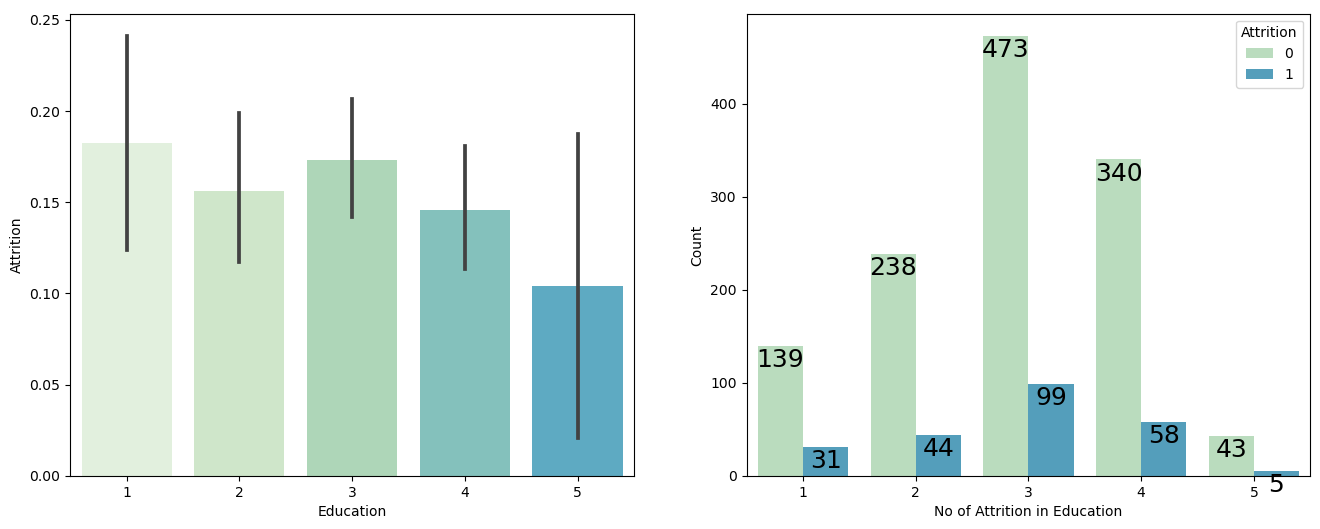

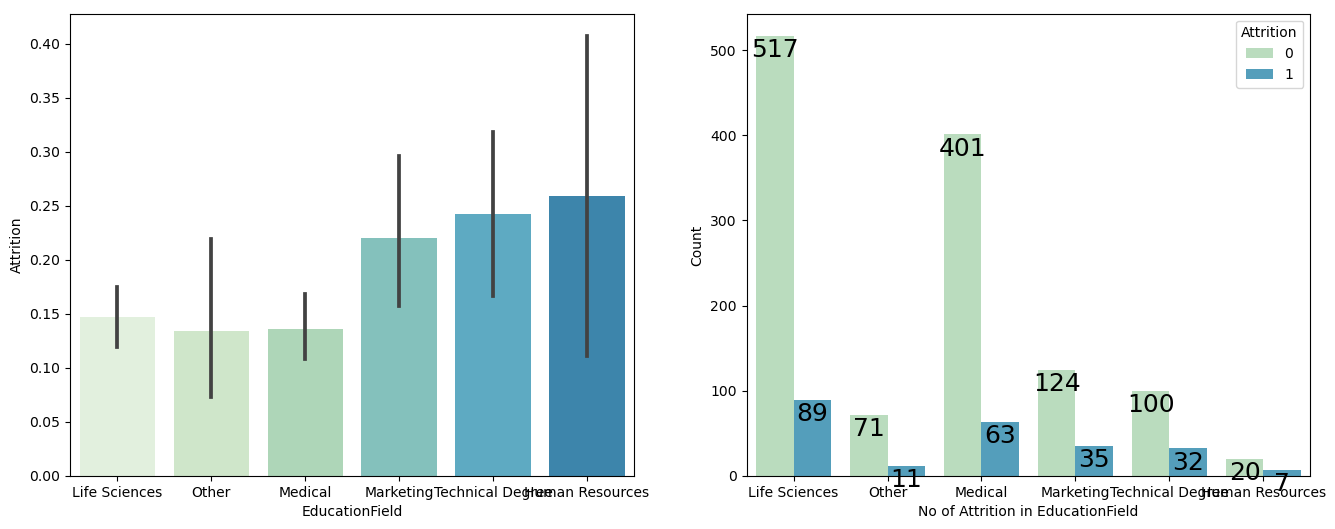

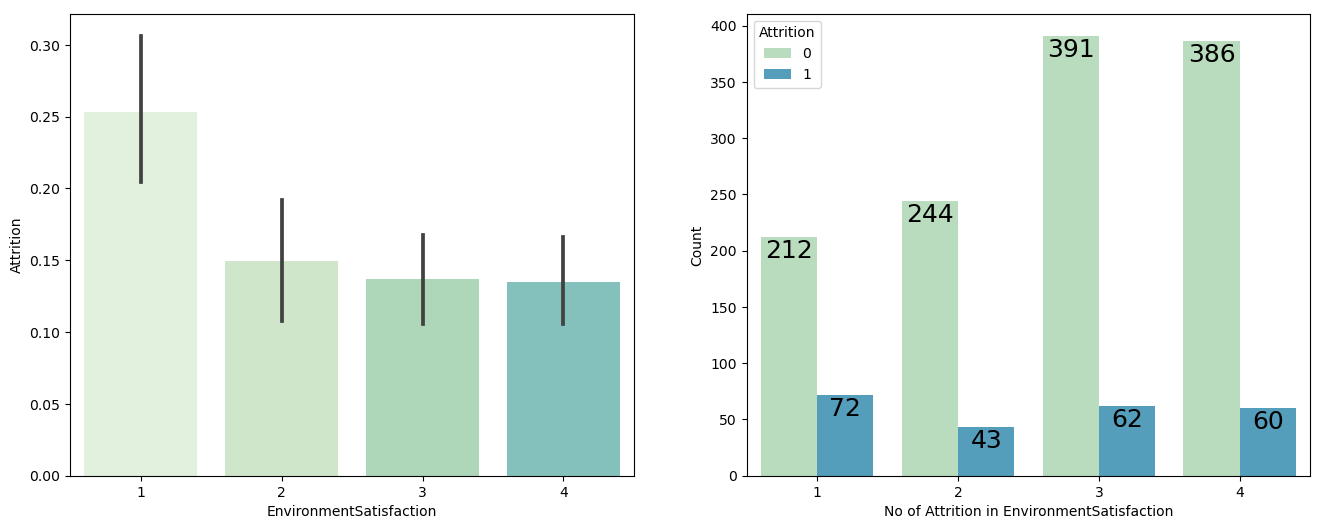

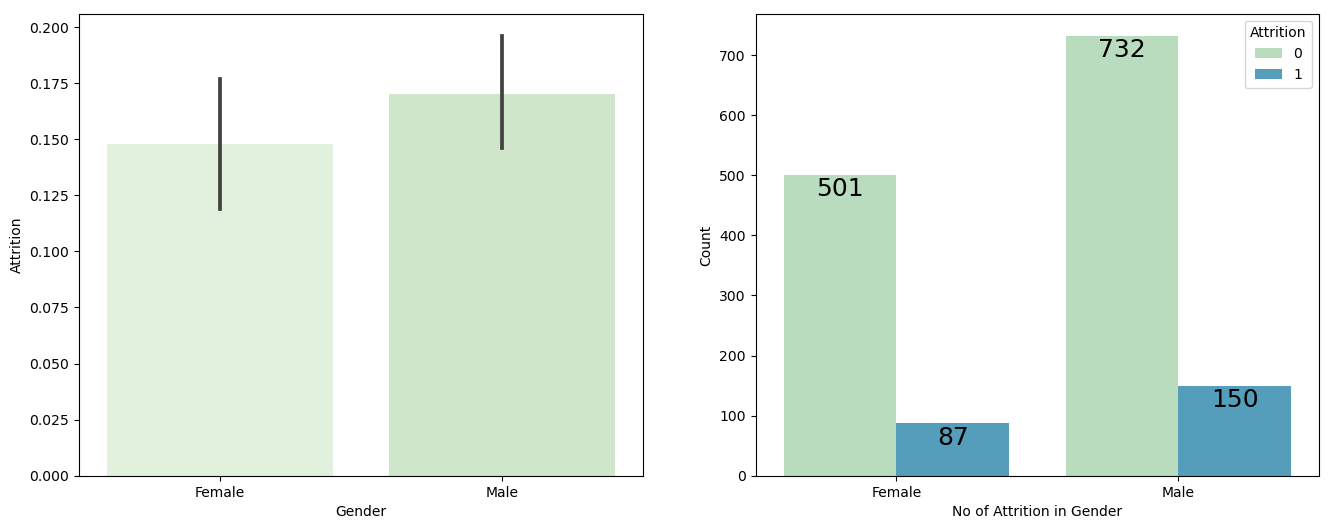

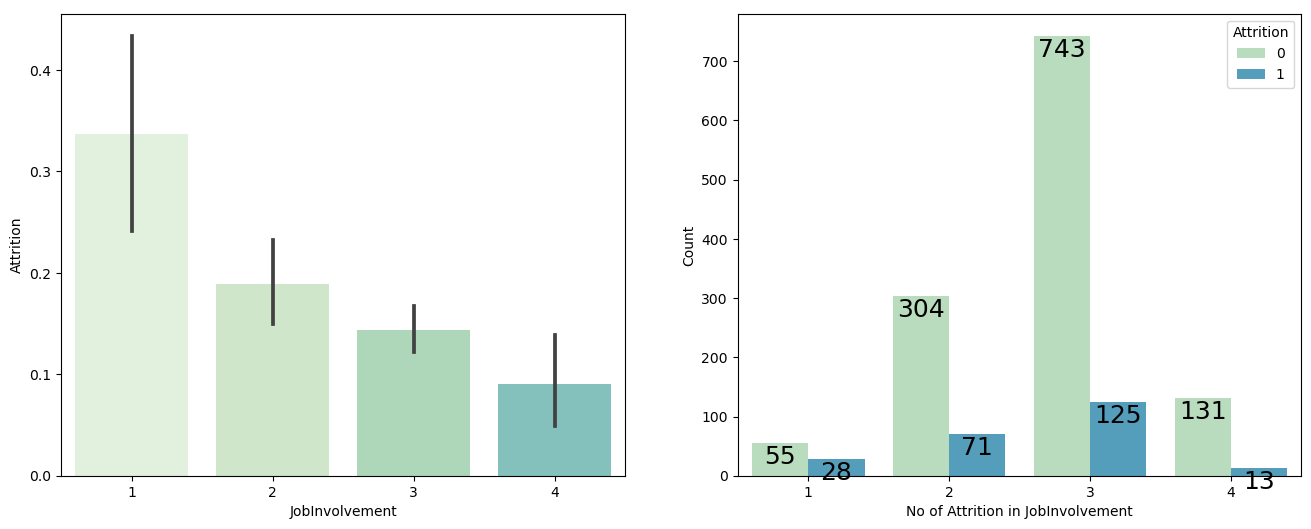

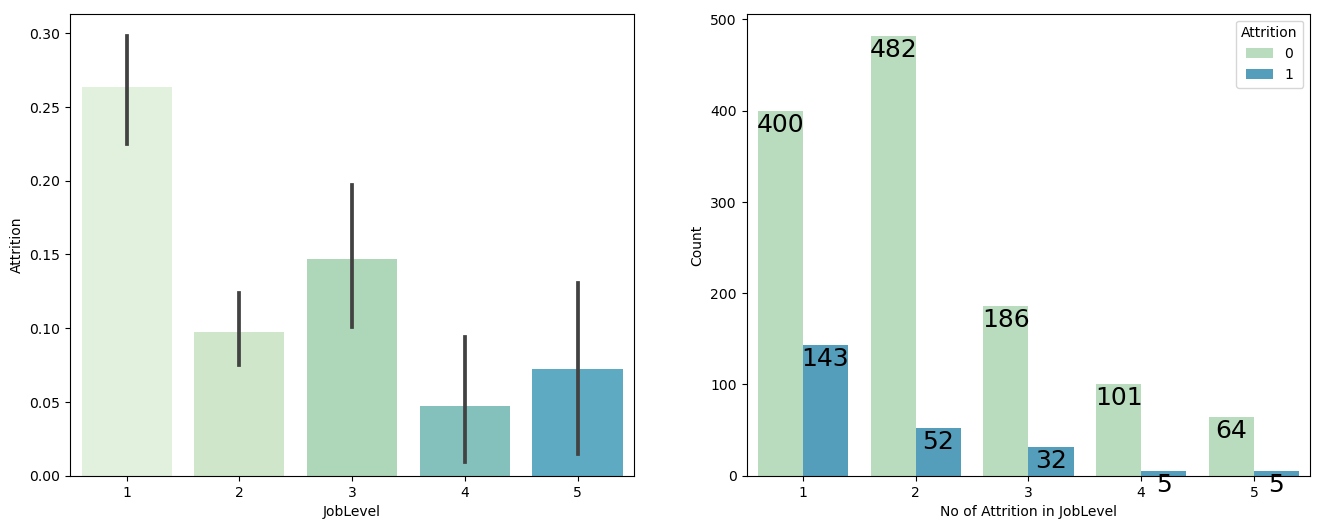

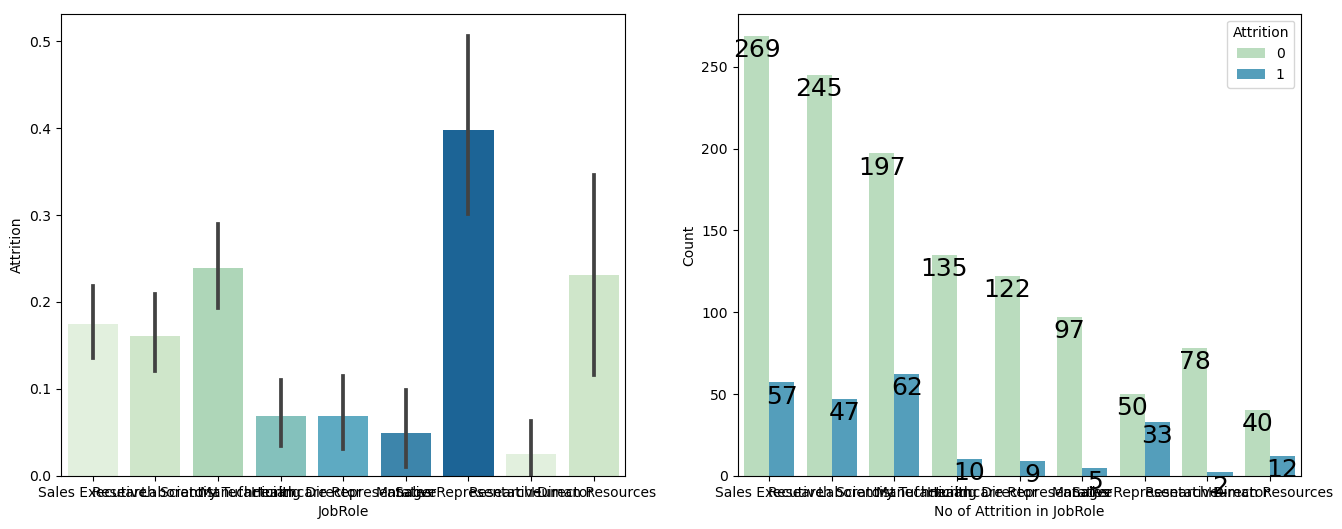

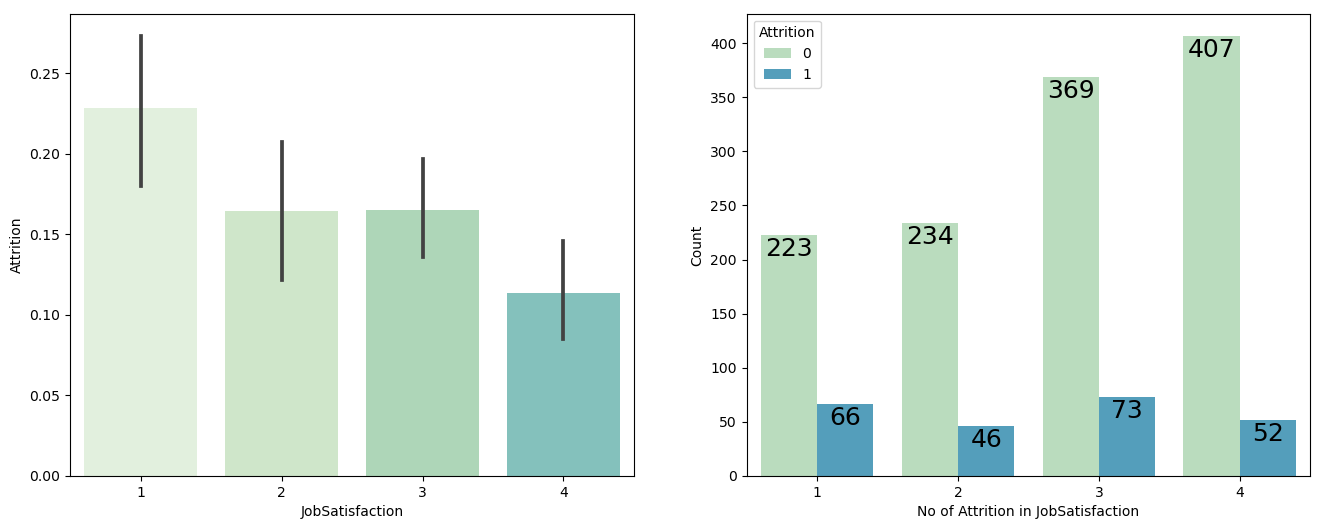

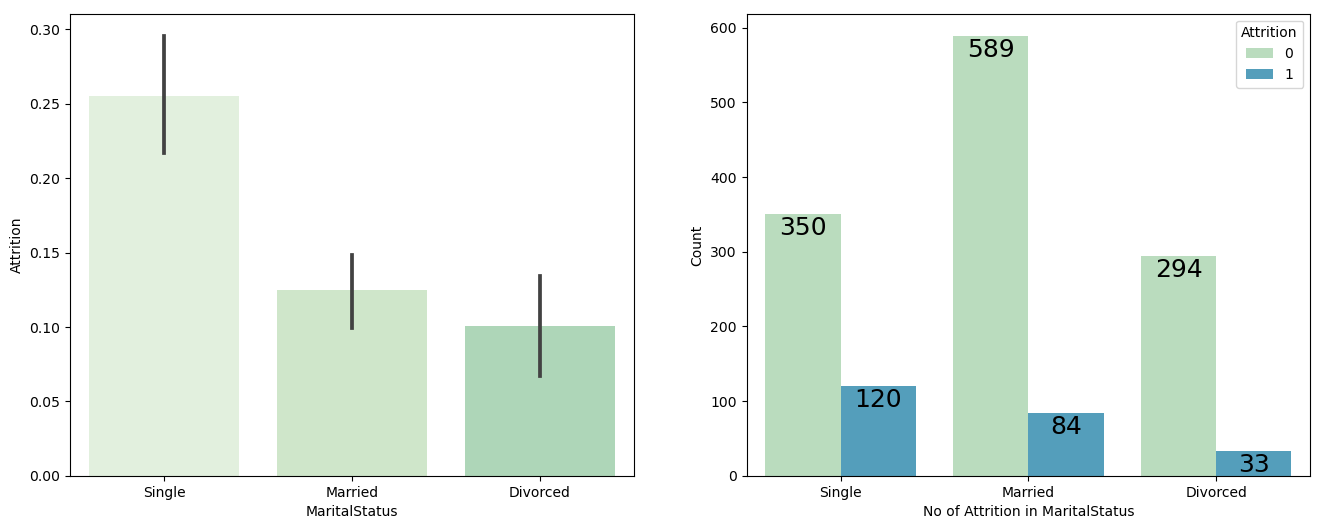

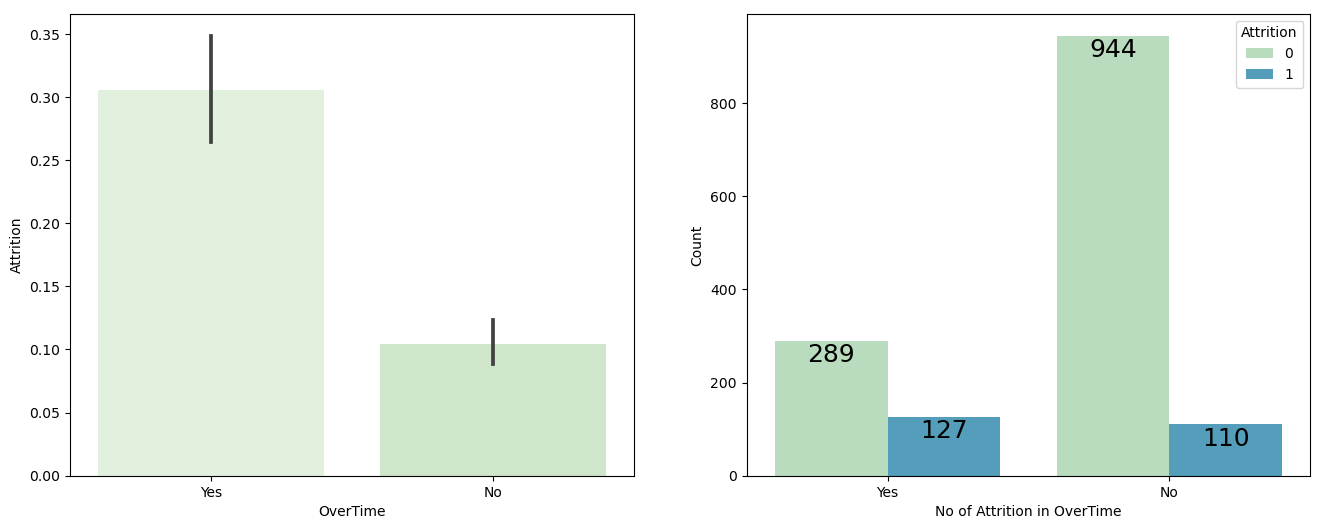

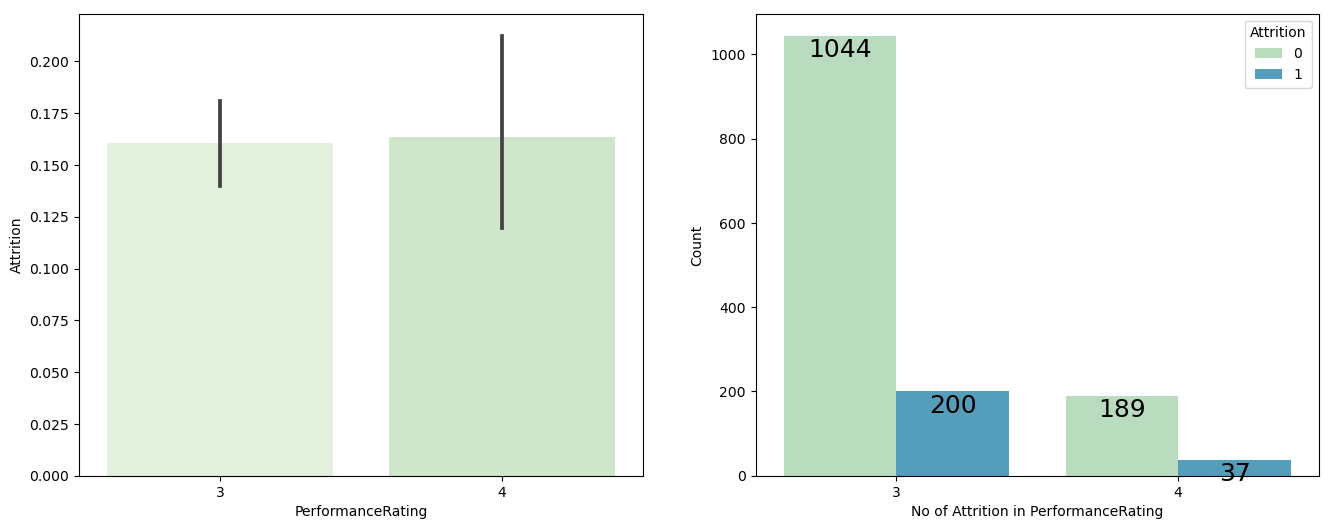

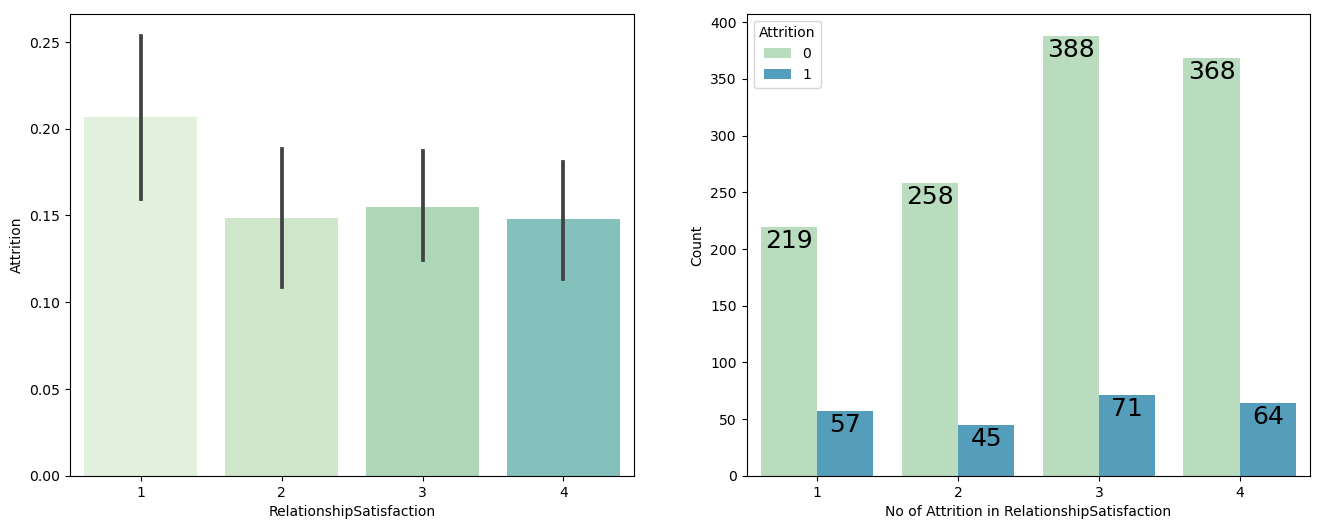

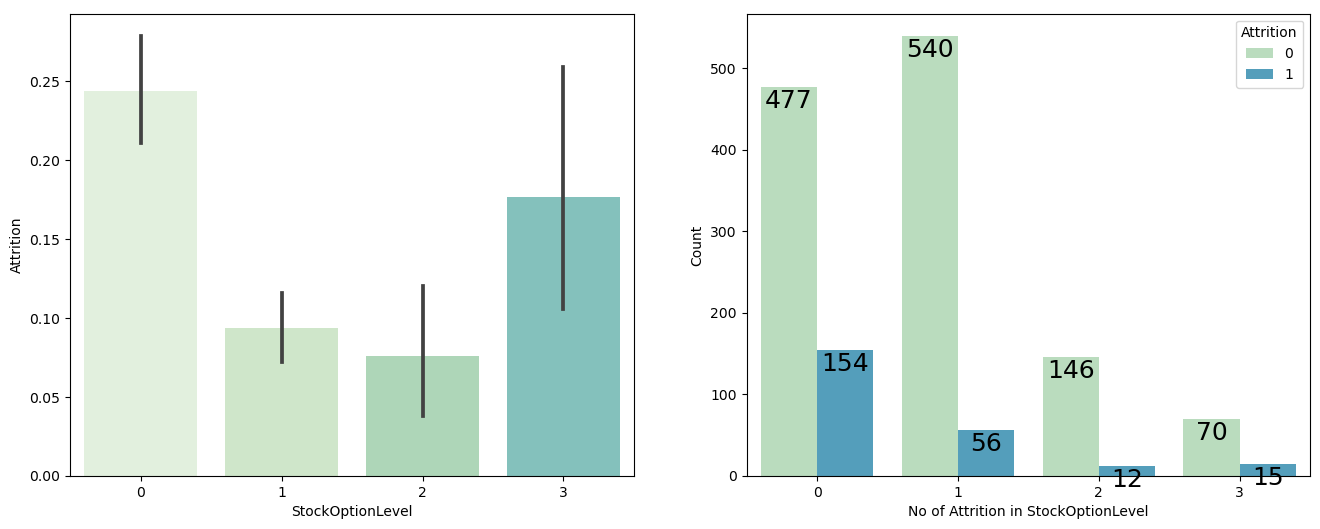

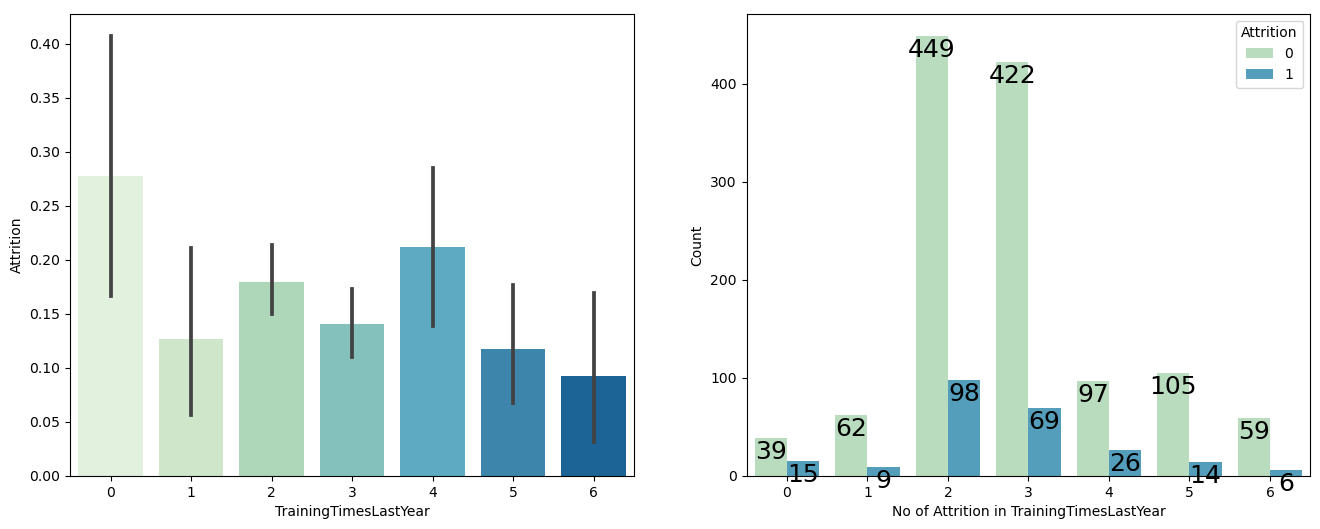

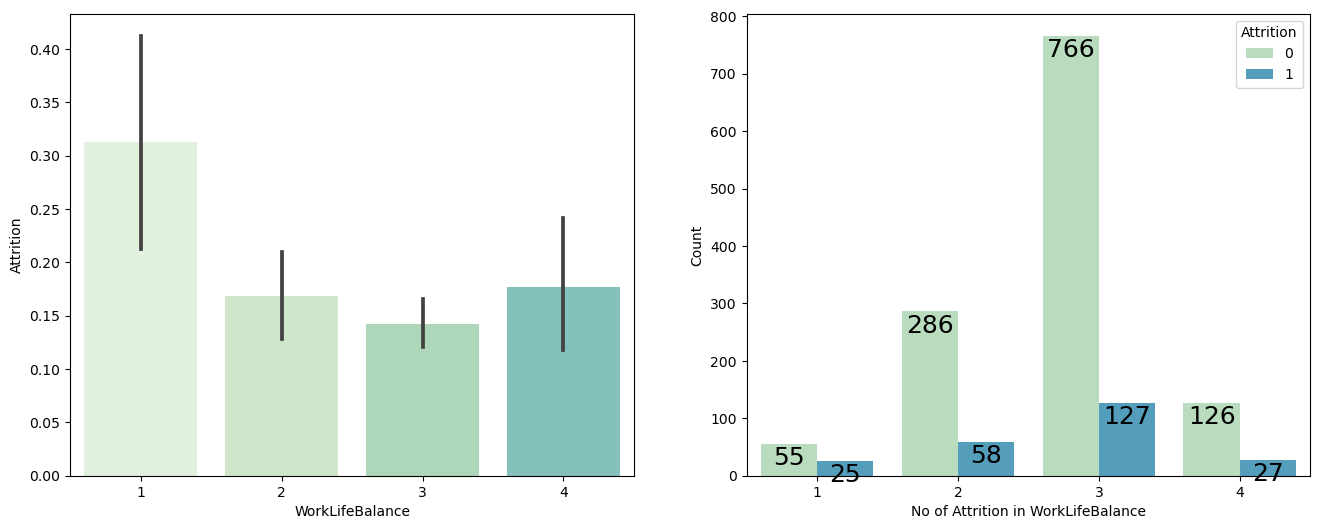

In [17]:
for col in cata:        
    fig, axes = plt.subplots(1,2, figsize=(16, 6))
    sns.barplot(x=col,y='Attrition',data=data,ax=axes[0],palette=pal_7)
    st ="No of Attrition in "+col
    count_Plot(col,data,st,"Count",axes[1],'Attrition')
plt.show
    

In [18]:
data.groupby('Gender')['Attrition'].mean().to_frame()

,Attrition
Gender,
Female,0.147959
Male,0.170068


In [19]:
data.groupby(['Gender','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
Gender Attrition               
Female 0            7019.429142
       1            4769.735632
Male   0            6704.964481
       1            4797.160000

In [20]:
data.groupby(['Gender','Attrition'])['MonthlyIncome'].median().to_frame()

MonthlyIncome
Gender Attrition               
Female 0                 5329.0
       1                 2886.0
Male   0                 5075.0
       1                 3407.5

In [21]:
data.groupby(['Gender','Attrition'])['Age'].mean().to_frame()

Age
Gender Attrition           
Female 0          38.155689
       1          32.574713
Male   0          37.154372
       1          34.206667

Above analysis confirms that Attrition rate of male is a bit higher than female.


MonthlyIncome rate, Age is almost equal for both Gender.


Therefore, we can conclude that Gender does not have much influence for Employee Attrition.

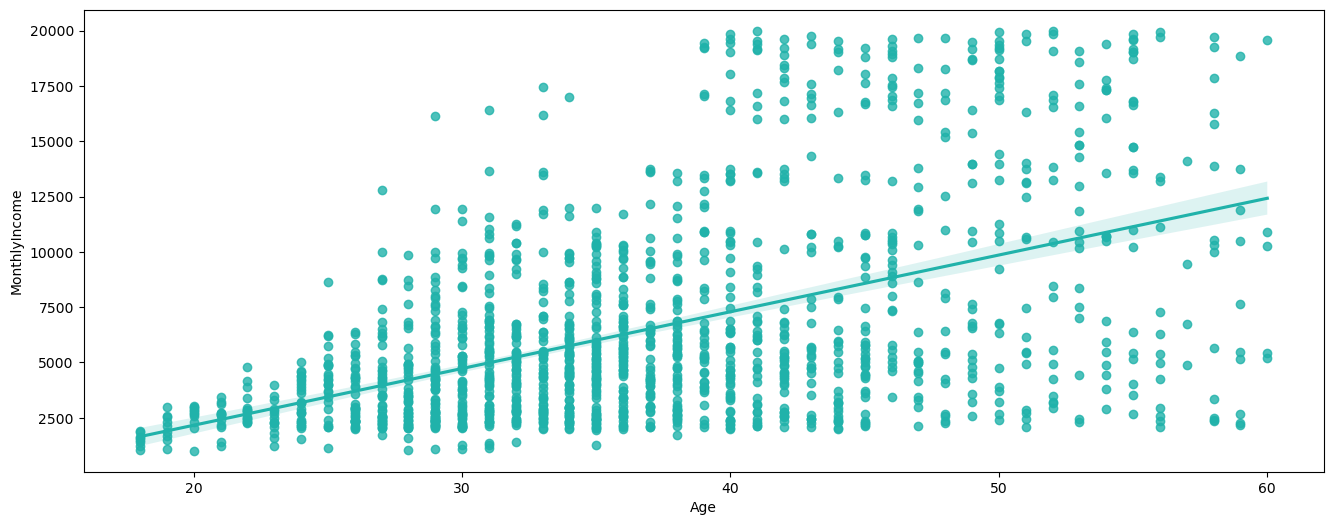

'There is a linear relation between Age and Monthly income'

In [22]:
#Plotting Age vs monthly income
plt.figure(figsize = (16,6))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data = data,color='lightseagreen')
plt.show()

"""There is a linear relation between Age and Monthly income"""

In [24]:
data.groupby(['Attrition'])['Age'].mean().to_frame()

,Age
Attrition,
0,37.561233
1,33.607595


In [26]:
data.groupby(['Attrition'])['MonthlyIncome'].mean().to_frame()

,MonthlyIncome
Attrition,
0,6832.739659
1,4787.092827


Noteable Point : Attrition rate is higher for those employees who are having lower income as well younger in age.

In [27]:
data.groupby('Department')['Attrition'].mean().to_frame()

,Attrition
Department,
Human Resources,0.190476
Research & Development,0.138398
Sales,0.206278


Noteable Point : Attrition rate and MonthlyIncome rate both are high in Sales Department.

<AxesSubplot:xlabel='Department', ylabel='DistanceFromHome'>

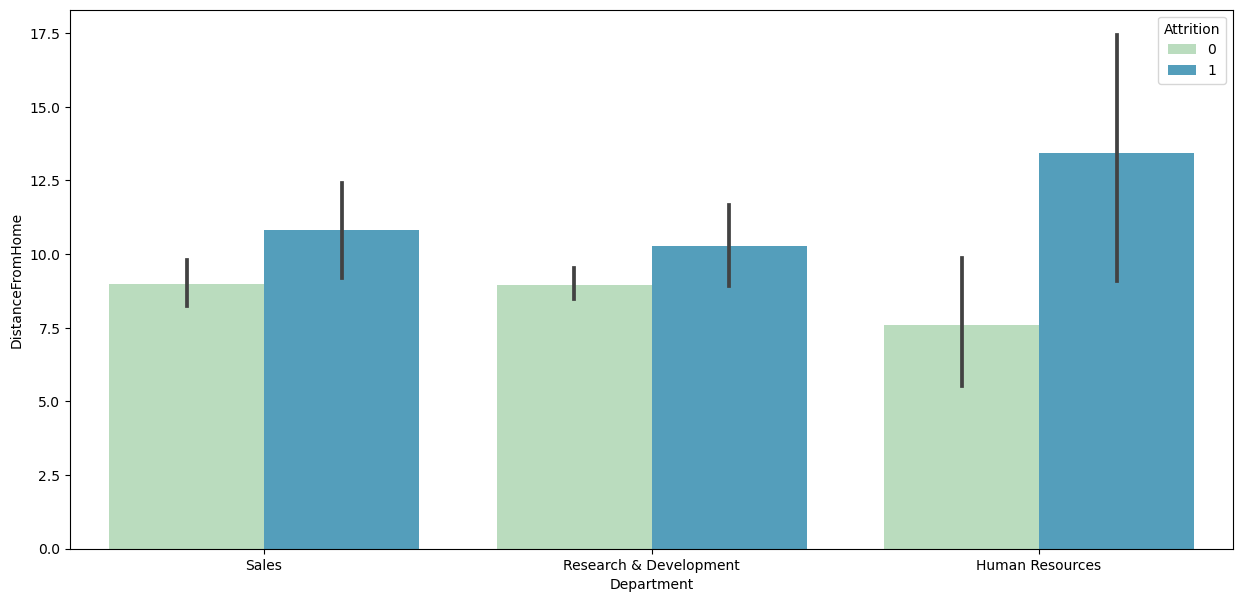

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x='Department',y='DistanceFromHome',data=data,hue='Attrition',palette=pal_2)

<AxesSubplot:xlabel='JobRole', ylabel='DailyRate'>

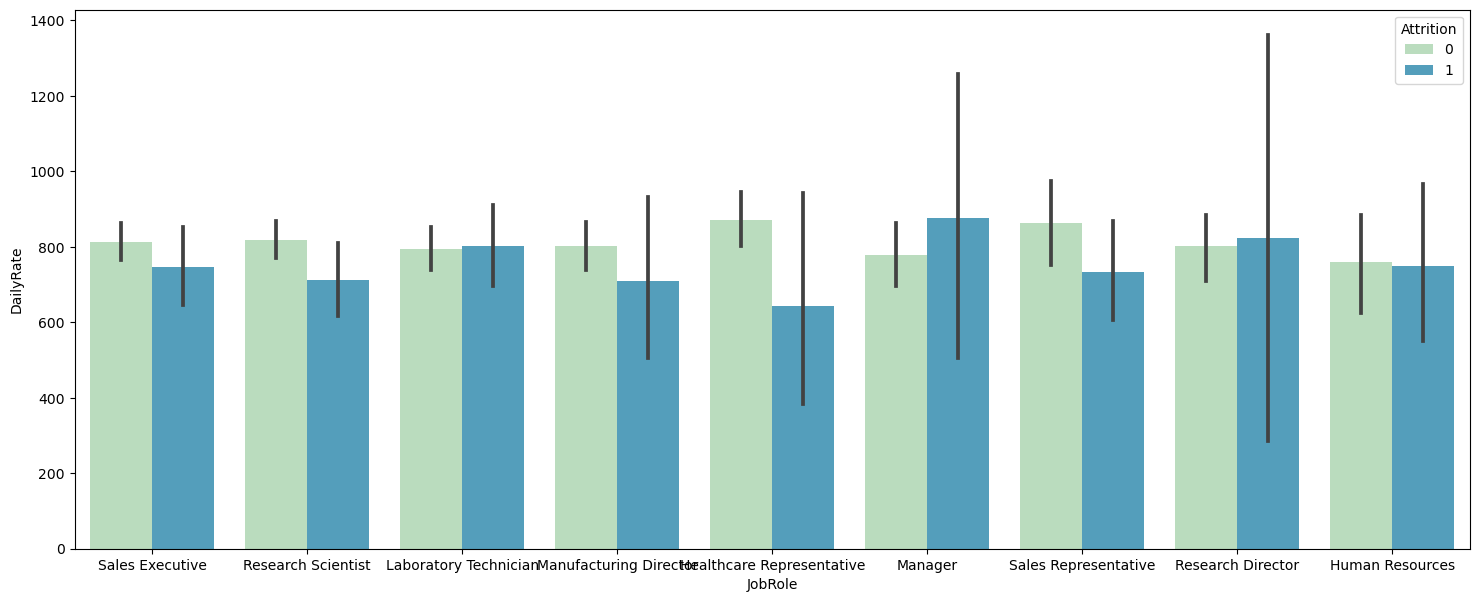

In [31]:
plt.figure(figsize=(18,7))
sns.barplot(x='JobRole',y='DailyRate',data=data,hue='Attrition',palette=pal_2)

Noteable Point : In each JobRole, employee those are leaving the company, their DailyRate rate is low as compare to those employee are staying in company.

In [32]:
Y=data[['Attrition']]
X=data.drop(['Attrition'],axis=1)

# Remove Features with Zero Variance

In [33]:
def unique_level(m):
    m = m.value_counts().count()
    return m
feature_val_count= pd.DataFrame(X.apply(lambda m: unique_level(m)))

In [34]:
feature_val_count.columns=['uni_level']
feat_level = feature_val_count.loc[feature_val_count['uni_level']>1]
feat_level_index = feat_level.index
X = X.loc[:,feat_level_index]

# Separate feature into numerical and categorical

In [35]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [36]:
feature_level_val = pd.DataFrame(num.nunique())
feature_level_val.columns = ['unique_level']

In [37]:
# All catagorical column with numical data
cat_feat = feature_level_val[feature_level_val['unique_level']<=20]
cat_fet_index = cat_feat.index
cat_column = num.loc[:,cat_fet_index]
cat_column.columns

Index(['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [38]:
# All numerical column after separating
num_feat = feature_level_val[feature_level_val['unique_level']>20]
num_fet_index = num_feat.index
numerical = num.loc[:,num_fet_index]
numerical.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')

In [39]:
# All catagorical column after separating
catagorical = pd.concat([char,cat_column],axis=1,join='inner')

<AxesSubplot:>

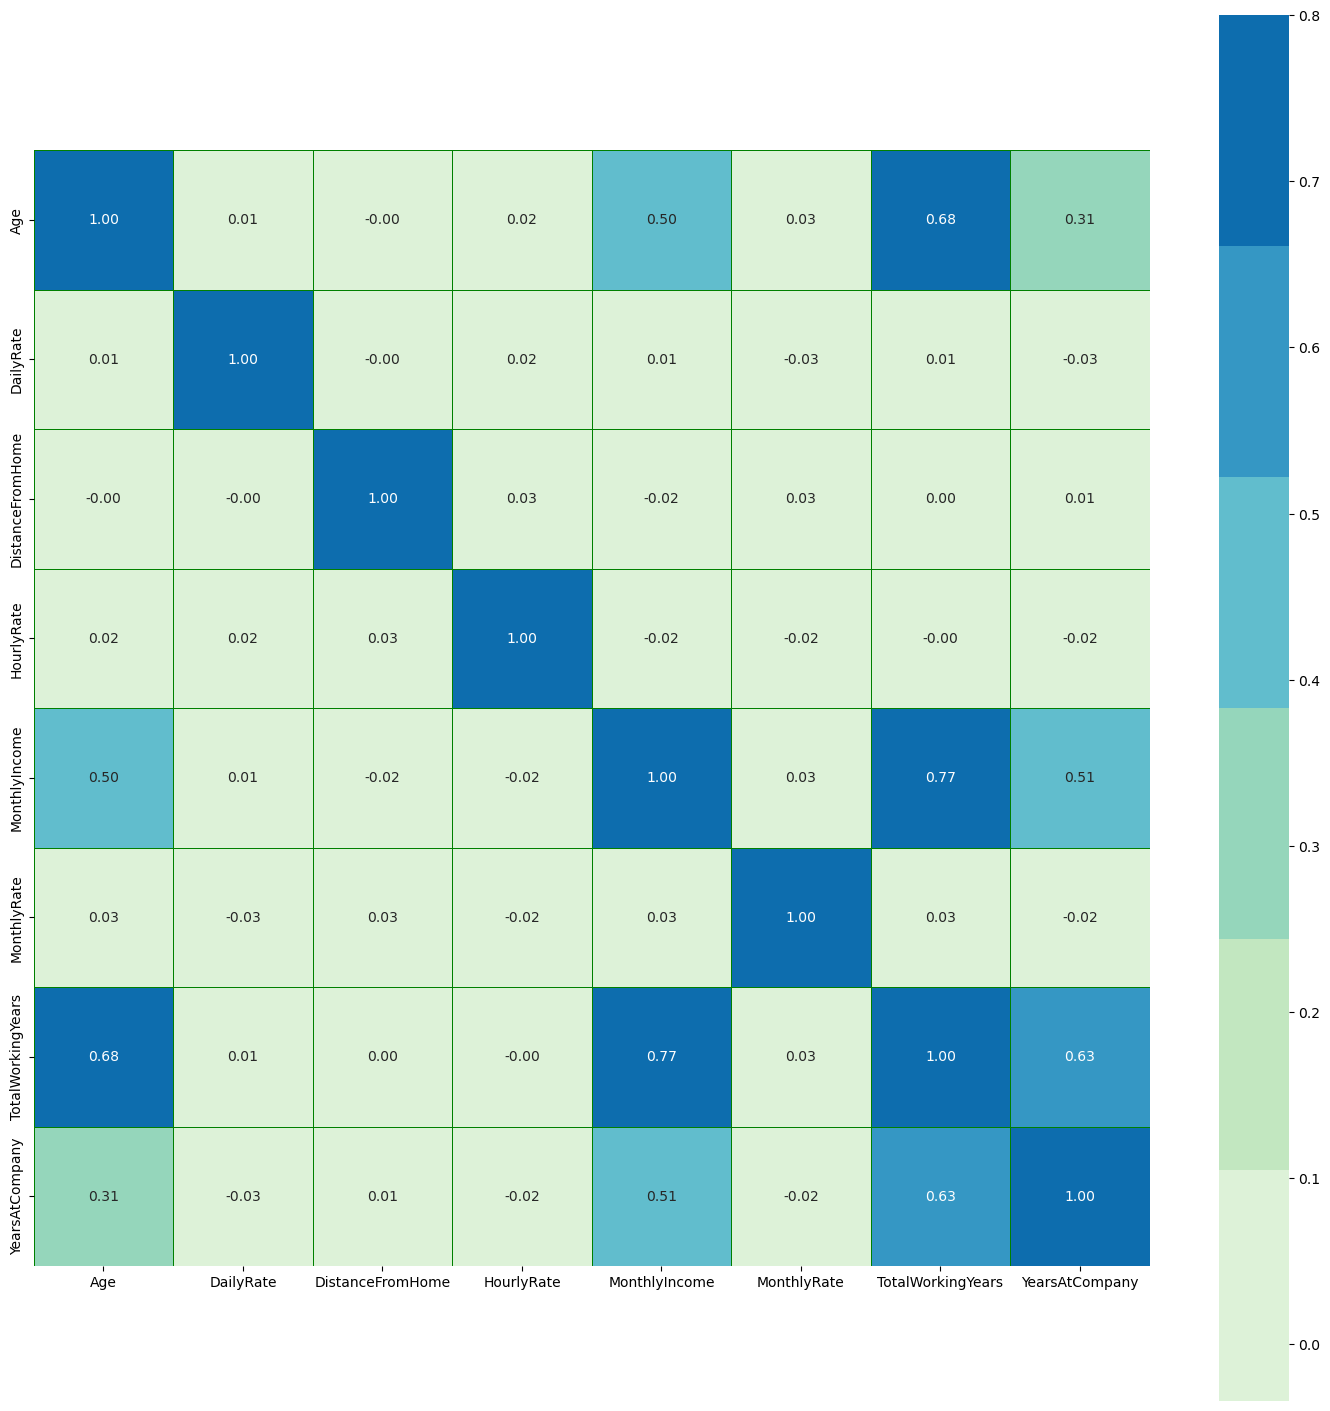

In [40]:
# Checking corelation between numefical featutes
plt.figure(figsize=(18,18))
cmap =sns.color_palette("GnBu",n_colors=6)
cor =numerical.corr()
sns.heatmap(cor,annot=True,vmax=0.8,cmap=cmap,fmt='.2f',linecolor='green',linewidths=0.7,square=True)